# Segmenting_customers_with_Python

In [32]:
# importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# loading the data
df = pd.read_excel(r"C:\Users\Zachary_B\Desktop\dataset\Online Retail.xlsx")

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


As you can notice, we have used this dataset a few times in the previous presentaions. As you might recall, there are a few things we need to clean up before we proceed.

## Data cleanup

In [35]:
df.shape

(541909, 8)

In [36]:
# Dropping canceled orders: We are going to drop records with negative Quantity, using the following code:
df = df.loc[df['Quantity'] > 0]

In [37]:
df.shape

(531285, 8)

In [38]:
# Dropping records with no CustomerID: There are 133,361 records with no CustomerID and we are going to drop those records with the following code:
df = df[pd.notnull(df['CustomerID'])]

In [39]:
df.shape

(397924, 8)

In [40]:
# Excluding an incomplete month: the data in the month of December, 2011, is incomplete. You can exclude this data with the following code:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [41]:
df.shape

(380620, 8)

In [42]:
# Computing total sales from the Quantity and UnitPrice columns: For our analyses, we need the total sales value, so we are going to multiply
# the two Quantity and UnitPrice columns, to get the total sales.
df['Sales'] = df['Quantity'] * df['UnitPrice']


In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [44]:
# Per-customer data: In order to analyze customer segments, we need to transform our data, so that each record represents 
# the purchase history of individual customers. Take a look at the following code:

customer_df = df.groupby('CustomerID').agg({'Sales': sum,'InvoiceNo': lambda x: x.nunique()})
customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

In [45]:
customer_df

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
...,...,...,...
18280.0,180.60,1,180.600000
18281.0,80.82,1,80.820000
18282.0,100.21,1,100.210000


Clustering algorithms are highly affected by the scales of the data, so we need to normalize this data to be on the same scale. We are going to take two steps to normalize this data

In [46]:
# First, we are going to rank the data, so that the values of each column range from 1 to 4298, which is the total number of records. 
# Take a look at the following code:
rank_df = customer_df.rank(method='first')

In [47]:
rank_df

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
...,...,...,...
18280.0,571.0,1537.0,1094.0
18281.0,104.0,1538.0,169.0
18282.0,158.0,1539.0,266.0


In [48]:
# Next, we are going to normalize this data to center around the mean and have a mean of 0 and a standard deviation of 1. 
# Take a look at the following code:

normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [49]:
normalized_df

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
...,...,...,...
18280.0,-1.272091,-0.493605,-0.850613
18281.0,-1.648440,-0.492799,-1.596058
18282.0,-1.604922,-0.491993,-1.517887


In [50]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4.298000e+03,4.298000e+03,4.298000e+03
mean,9.952744e-17,-1.231371e-16,5.719018e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731446e+00,-1.731446e+00,-1.731446e+00
25%,-8.657232e-01,-8.657232e-01,-8.657232e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.657232e-01,8.657232e-01,8.657232e-01
max,1.731446e+00,1.731446e+00,1.731446e+00


From the result above you can see that the values are centered around at 0 and have a standard deviation of 1. We are going to use this data for the following clustering analyses

## k-means clustering
The k-means clustering algorithm is a frequently used algorithm for drawing insights into the formations and separations within data. In marketing, it is often used to build customer segments and understand the behaviors of these different segments. Let's dive into building clustering models in Python.

In [51]:
# In order to use the k-means clustering algorithm in the scikit-learn package, we need to import the kmeans module, 
# as shown in the following code:
from sklearn.cluster import KMeans

In [52]:
# Then, you can build and fit a k-means clustering model, using the following code:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount','AvgOrderValue']])

In [53]:
# The trained model object, kmeans, stores the labels and centers of the clusters in the labels_ and cluster_centers_ attributes of 
# the model object. You can retrieve these values as shown in the following code:


print(kmeans.labels_)
kmeans.cluster_centers_

[2 1 1 ... 0 3 1]


array([[-1.24090997, -0.79043908, -1.05914614],
       [ 1.20686587,  1.00577374,  0.86930726],
       [-0.13229361, -0.84649738,  0.79586464],
       [ 0.2292729 ,  0.72651836, -0.64266766]])

In [54]:
# Now that we have built our first clustering model, let's visualize this data. First, take a look at the following code: 

four_cluster_df = normalized_df[['TotalSales', 'OrderCount','AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [55]:
four_cluster_df

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,2
12347.0,1.457445,1.064173,1.401033,1
12348.0,0.967466,0.573388,0.929590,1
12349.0,0.944096,-1.730641,1.683093,2
12350.0,-0.732148,-1.729835,0.331622,2
...,...,...,...,...
18280.0,-1.272091,-0.493605,-0.850613,0
18281.0,-1.648440,-0.492799,-1.596058,0
18282.0,-1.604922,-0.491993,-1.517887,0


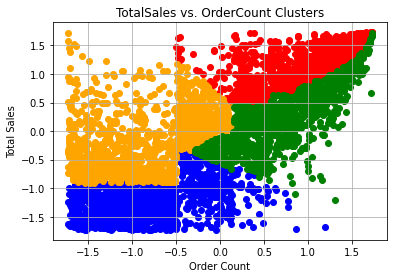

In [56]:
# We store the cluster label information for each record into a newly created DataFrame, four_cluster_df. With this DataFrame, 
# we can visualize the clusters, using the following code:

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()




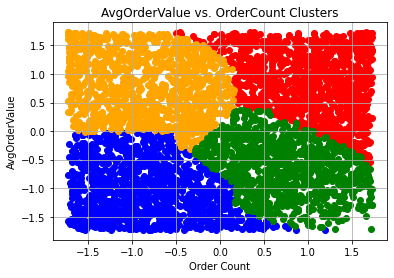

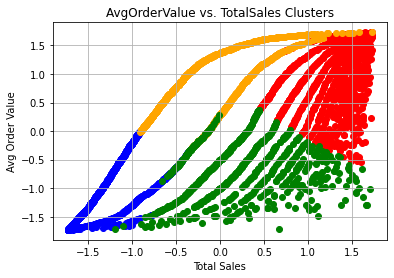

In [57]:
# We can also visualize the clusters with different angles, using the rest of the variables. Take a look at the following plots:

plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
c='blue'
)
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
c='red'
)
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
c='orange'
)
plt.scatter(
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
c='green'
)
plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('AvgOrderValue')
plt.grid()
plt.show()



plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

The first plot shows the clusters visualized based on AvgOrderValue and OrderCount. On the other hand,  the second plot shows the clusters visualized based on AvgOrderValue and TotalSales. 

## Selecting the best number of clusters

In [60]:
# In the scikit-learn package, you can use the silhouette_score function in the sklearn.metrics module to calculate the
# silhouette score and measure the quality of clusters. Take a look at the following code:

from sklearn.metrics import silhouette_score

for n_cluster in [3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 3 Clusters: 0.4133
Silhouette Score for 4 Clusters: 0.4115
Silhouette Score for 5 Clusters: 0.3771
Silhouette Score for 6 Clusters: 0.3784
Silhouette Score for 7 Clusters: 0.3912
Silhouette Score for 8 Clusters: 0.3812


## Interpreting customer segments
In this section, we are going to discuss different ways to draw insights from the results of the previous clustering analysis. Let's first build a 
k-means clustering model with four clusters. You can use the following code:

In [61]:
# Let's first build a k-means clustering model with four clusters. You can use the following code:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
four_cluster_df = normalized_df[['TotalSales', 'OrderCount','AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_


In [62]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,1
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12349.0,0.944096,-1.730641,1.683093,1
12350.0,-0.732148,-1.729835,0.331622,1


In [63]:
# The first thing we are going to look at is the centers of each cluster. You can get the cluster centers using the following code:
kmeans.cluster_centers_

array([[ 0.24889228,  0.74548572, -0.6405685 ],
       [-0.13686053, -0.85084233,  0.79265947],
       [ 1.20406036,  0.99783781,  0.87893316],
       [-1.23169393, -0.78073571, -1.05471089]])

In [64]:
# Lastly, we can also find out what the best-selling items are for each customer segment. Take a look at the following code: 

high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
pd.DataFrame(df.loc[df['CustomerID'].isin(high_value_cluster.index)].groupby('Description').count()['StockCode'].sort_values(ascending=False).head())


,StockCode
Description,
JUMBO BAG RED RETROSPOT,1128
REGENCY CAKESTAND 3 TIER,1077
WHITE HANGING HEART T-LIGHT HOLDER,1062
LUNCH BAG RED RETROSPOT,923
PARTY BUNTING,859


As we have seen before, the third cluster was the group of high-value customers, and we are going to take a look at the top five best-selling items
for this group.

In [65]:
high_value_cluster

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12352.0,1.193114,1.309162,0.169639,2
12356.0,1.268868,0.158357,1.557375,2
12359.0,1.585581,0.574194,1.672617,2
...,...,...,...,...
18259.0,1.154432,0.570970,1.482428,2
18260.0,1.227768,1.201979,0.898966,2
18263.0,0.613682,0.571776,0.736177,2


In [67]:
low_value_high_volume = four_cluster_df.loc[four_cluster_df['Cluster'] == 0]


In [68]:
low_value_high_volume

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12364.0,0.425911,0.159968,0.330816,0
12399.0,0.533094,0.578223,-0.104362,0
12413.0,0.160774,0.163192,-0.243781,0
12414.0,-0.180921,0.163998,-0.796618,0
12421.0,0.224439,0.579029,-0.662035,0
...,...,...,...,...
18241.0,1.071426,1.633128,-1.359127,0
18245.0,0.900578,1.201173,-0.096303,0
18246.0,-0.125315,0.152715,0.017327,0


# Predicting customer churn withPython

In [ ]:
# importing the necessary library and loading the dataset 

import pandas as pd
df = pd.read_csv(r"C:\Users\Zachary_B\Desktop\dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

## Data analysis and preparation
### 1 Target variable encoding: 

In [ ]:
# We are going to encode these values as 1 for Yes and 0 for No. The code to encode the target variable looks like the following:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# To get the overall churn rate, you can simply run the following code:
df['Churn'].mean()

In [ ]:
df['Churn'].mean()*100

### 2. Handling missing values  

In [ ]:
import numpy as np

In [ ]:
# Since there are only 11 records with missing TotalCharges values, we are going to simply ignore and drop those records with 
# missing values. Take a look at the following code:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan).astype(float)
df = df.dropna()

### 3. Transforming continuous variables: 

In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

In [ ]:
# ANN models typically perform better with scaled or normalized features. Take a look at the following code for normalizing these
# three features:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] -
df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()
df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] -
df['TotalCharges'].mean())/df['TotalCharges'].std()
df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

In [ ]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

As you see from this output, all the variables now have a mean of 0 and a stand deviation of 1. We are going to use these normalized variables for future model building.

### 4. One-hot encoding categorical variables: 

In [ ]:
# As you can see from the data, there are many categorical variables. Let's first take a look at the number of unique
# values each column has. Take a look at the following code:
for col in list(df.columns):
      print(col, df[col].nunique())

As this output suggests, there are 7032 unique customer IDs, 2 unique genders, 3 unique values for MultipleLines, and 6530 unique values for TotalCharges. We have handled the tenure, MonthlyCharges, and TotalCharges variables, in the previous step, so we are going to focus on those variables with 2 to 4 unique values.


In [ ]:
# Let's take a look at the distributions of some of these categorical variables. First, to view the distribution of the data between males and females,
# you can use the following code for visualization:

df.groupby('gender').count()['customerID'].plot(kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender')
plt.show()

# You can use the same code to view the distribution of the data across different values of InternetService and PaymentMethod.
# Take a look at the following plots:

df.groupby('InternetService').count()['customerID'].plot(kind='bar', color='skyblue', grid=True, figsize=(8,6), title='InternetService')
plt.show()

df.groupby('PaymentMethod').count()['customerID'].plot(kind='bar', color='skyblue', grid=True, figsize=(8,6), title='PaymentMethod')
plt.show()

The first plot shows the distribution of the data across three different categories of the InternetService variable, and the second plot shows the distribution of the data across four different categories of the PaymentMethod variable. As you can see from these plots, we can easily visualize and understand what the distributions ofcategorical variables look like using bar plots. 

In [ ]:
# Now, we are going to apply one-hot encoding for these categorical variables. Take a look at the following code:

dummy_cols = []
sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col]) 
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]
        sample_set = pd.concat([sample_set, dummy_vars],axis=1)


In [ ]:
sample_set.head(10)

As you can see from this code, we are using the get_dummies function in the pandas package to create dummy variables for each categorical variable. Then, we concatenate these newly created dummy variables back to the sample_set variable, which will be used for training models in the following section.

## ANN with Keras

In [ ]:
import tensorflow as tf

In [ ]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# In this demo, we are going to build a neural network model with one hidden layer. Take a look at the following code first:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# The final step to build a neural network model with the keras package is to compile this model. Take a look at the following code:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Before we start training this neural network model, we will need to split our sample set into train and test sets. Take a look at the following code:

from sklearn.model_selection import train_test_split

target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]
X_train, X_test, y_train, y_test = train_test_split(sample_set[features],sample_set[target_var],test_size=0.3)


In [ ]:
# Now we can train our neural network modelusing the following code:

model.fit(X_train, y_train, epochs=50, batch_size=100)

Here, we are using 100 samples as batch_size, from which the model is going to learn to predict each time, and 50 as the number of epochs, which is the number of complete passes through the entire training set.

As you can see from this output, loss typically decreases and the accuracy (acc) improves in each epoch. However, the rate of model performance improvement decreases over time. As you can see from this output, there are big improvements in the loss and accuracy measures in the first few epochs
and the amount of performance gain decreases over time. You can monitor this process and decide to stop when the amount of performance gain is minimal.

## Model evaluations

In [ ]:
# We are going to look at the overall accuracy, precision, and recall, as well as the receiver operating characteristic (ROC) curve and
# area under the curve (AUC). First, take a look at the following code for computing accuracy, precision, and recall:

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]
# Accuracy

print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

# Precision
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

# Recall
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

 The accuracy of predicting whether a customer will churn or not in the test set is about 0.79, suggesting the model is correct roughly about 80% of the time. The out-of-sample precision suggests that the model is correct about 61% of the time that it predicts that thecustomer is going to churn, and the out-of-sample recall suggests that the model captures roughly 55% of the churn cases. 


In [ ]:
# Next, we can compute the AUC numbers, using the following code:
from sklearn.metrics import roc_curve, auc

in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]

In [ ]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train,
in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test,
out_sample_preds)
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)
print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In [ ]:
# To visualize this data in the ROC curve, you can use the following code:
plt.figure(figsize=(10,7))
plt.plot(
out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve(area = %0.4f)' % in_sample_roc_auc)

plt.plot(
in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

Looking at the accuracy, precision, and recall measures, the AUC and the ROC curve also suggest that the model captures
and predicts those customers at churn risk pretty well. As you can see from these evaluation outputs, it is better to use the output of this model for
identifying the customers who are likely to churn than simply guessing who they will be. By focusing on these customers with high churn probabilities
from this model in your marketing strategies, you can try to retain those customers at churn risks in a more cost-effective way.